# Ejemplo PCA 3D

Ignacio Díaz Blanco, 2019-2023. Universidad de Oviedo.

### Descripción
Ejemplo de proyección PCA de datos 3D sobre un espacio 2D. La idea consiste en crear un hiperplano 2D definido por:

1) el centro de masas de los datos originales (vector de medias 3D)  
2) las dos direcciones principales de variación, definidas por los dos vectores principales de la matriz de covarianzas. 

Las (dos) coordenadas del vector de posición de cada dato en las dos direcciones que definen el plano, son representadas en un plano 2D, definiendo así las proyecciones

In [1]:
import numpy as np
import numpy.matlib as npmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# número de muestras
N = 200;

# conjunto de datos: creamos tres agrupaciones (clusters) centradas en tres puntos distintos
p = np.hstack((
    np.random.randn(3,N) + npmat.repmat(np.array([[1,2,1]]).T,1,N),
    np.random.randn(3,N) + npmat.repmat(np.array([[3,2,7]]).T,1,N),
    np.random.randn(3,N) + npmat.repmat(np.array([[-3,-5,1]]).T,1,N)
    ))


# calculamos la media ("centro de masas" de los datos) ...
m = np.mean(p,axis=1);

# ... para centrar el conjunto de datos quitándole esa media
pm = p - m[:,np.newaxis]

# calculamos la matriz de covarianzas
C = np.cov(pm)

# obtenemos los valores singulares (también se puede hacer con valores propios)
u,s,v = np.linalg.svd(C)

# las columnas de u son vectores unitarios indicando las direcciones principales
# los elementos de s son los valores propios (varianzas en las direcciones principales)

# descomponemos en componentes principales, proyectando pm 
# sobre los vectores unitarios de las direcciones principales
a = np.dot(u.T,pm)

# la i-esima fila de a contiene las coordenadas de cada punto en la dirección i-ésima

## Dibujamos los resultados

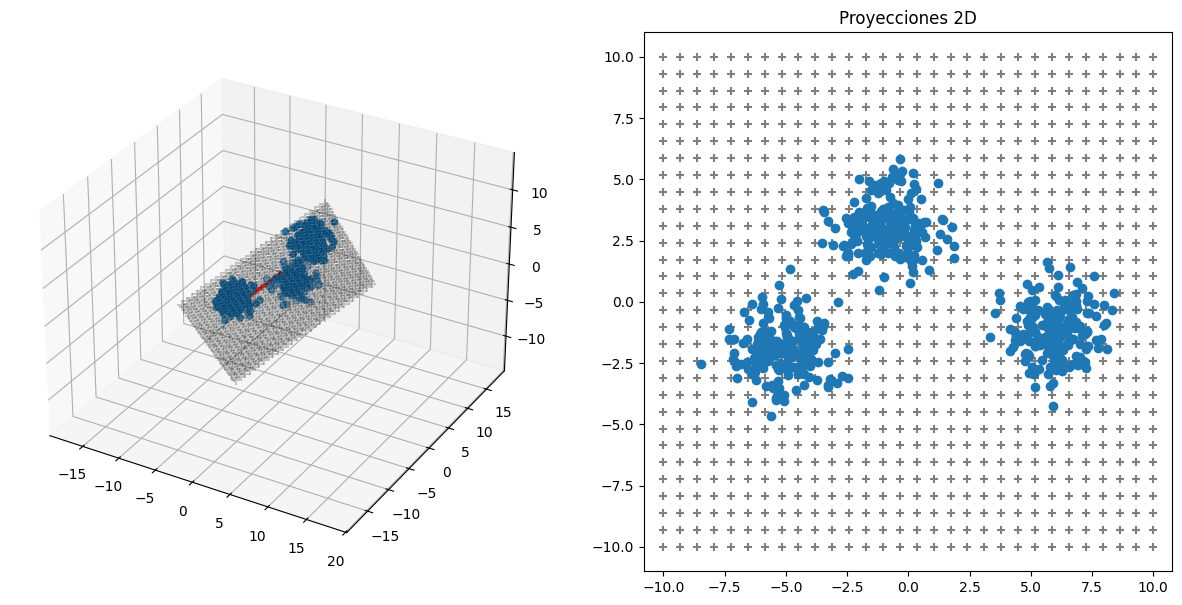

In [2]:
fig = plt.figure(1,figsize=(15,7))
plt.clf()


# ESPACIO DE LOS DATOS (3D)
# definimos un subplot de tipo 3D (creamos ejes ax1)
ax1 = fig.add_subplot(1,2,1,projection='3d')

# dibujamos la nube de puntos 3D sobre los ejes ax1 
ax1.scatter(p[0,:],p[1,:],p[2,:])

# dibujamos los vectores principales
# el vector i-esimo va desde la posición del centro m[:] hasta dicha posición sumando u[:,i]
# los vectores u son unitarios. Para darles la longitud correspondiente los multiplicamos 
# por la raíz cuadrada de su valor propio
for i,v in enumerate(s):
    ax1.plot([m[0], m[0]+u[0,i]*np.sqrt(s[i])], 
            [m[1], m[1]+u[1,i]*np.sqrt(s[i])], 
            [m[2], m[2]+u[2,i]*np.sqrt(s[i])], color='red', alpha=0.8, lw=3)

# creamos una malla de 30x30 elementos, cubriendo el rango 
ir = np.linspace(-10,10,30)
jr = np.linspace(-10,10,30)
aux = np.meshgrid(ir,jr)
x = np.array([aux[0].reshape(900),aux[1].reshape(900)])

y = np.dot(u[:,0:2],x)

# dibujamos los nodos en 3D de la retícula plana
ax1.scatter(y[0,:],y[1,:],y[2,:],alpha=0.2,c='black',s=40,marker='+')    
plt.axis('equal')


# ESPACIO DE VISUALIZACIÓN (2D)

# definimos un subplot (ejes ax2)
ax2 = fig.add_subplot(1,2,2)

# dibujamos las coordenadas de la retícula
ax2.scatter(x[0,:],x[1,:],alpha=0.5,s=40,c='black',marker='+')

# dibujamos las proyecciones 2D (coordenadas en las 2 direcciones principales) 
ax2.scatter(a[0,:],a[1,:])
ax2.axis('equal')
plt.title('Proyecciones 2D')

plt.show()

# Proyección PCA mediante scikit-learn
Los resultados son similares, salvo posiblemente el signo de las componentes principales, que puede distinto por la elección arbitraria del sentido en los vectores principales.

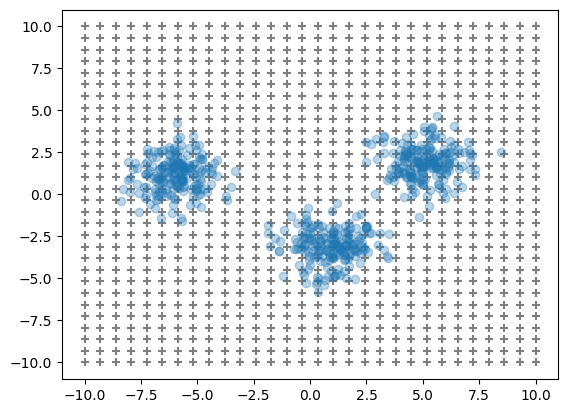

In [3]:
from sklearn.decomposition import PCA

X = p.T
pca = PCA(n_components=2)
pr = pca.fit_transform(X)

plt.scatter(x[0,:],x[1,:],alpha=0.5,s=40,c='black',marker='+')
plt.scatter(pr[:,0],pr[:,1],alpha=0.3)

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Ejemplo PCA 3D"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.